In [2]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def generateAndCheckOutput(test_inputs, correct_outputs, weight1, weight2, bias):
    outputs = []
    # Generate and check output
    for test_input, correct_output in zip(test_inputs, correct_outputs):
        linear_combination = weight1 * test_input[0] + weight2 * test_input[1] + bias
        output = int(linear_combination >= 0)
        is_correct_string = 'Yes' if output == correct_output else 'No'
        outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

    # Print output
    num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
    output_frame = pd.DataFrame(outputs, columns=['Input 1', '  Input 2', '  Linear Combination', '  Activation Output', '  Is Correct'])
    if not num_wrong:
        print('Nice!  You got it all correct.\n')
    else:
        print('You got {} wrong.  Keep trying!\n'.format(num_wrong))
    print(output_frame.to_string(index=False))


## AND-Perceptron

In [6]:
# TODO: Set weight1, weight2, and bias for AND-Perceptron
weight1 = 1.0
weight2 = 1.0
bias = -2.0

# Inputs and outputs for AND-Perceptron
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
generateAndCheckOutput(test_inputs, correct_outputs, weight1, weight2, bias)

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -2.0                    0          Yes
      0          1                  -1.0                    0          Yes
      1          0                  -1.0                    0          Yes
      1          1                   0.0                    1          Yes


## OR-Perceptron

In [8]:
# TODO: Set weight1, weight2, and bias for OR-Perceptron
weight1 = 1.0
weight2 = 1.0
bias = -1.0

# Inputs and outputs for OR-Perceptron
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, True, True, True]
generateAndCheckOutput(test_inputs, correct_outputs, weight1, weight2, bias)

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                  -1.0                    0          Yes
      0          1                   0.0                    1          Yes
      1          0                   0.0                    1          Yes
      1          1                   1.0                    1          Yes


## NOT-Perceptron

In [7]:
# TODO: Set weight1, weight2, and bias for NOT-Perceptron
weight1 = 0.0
weight2 = -3.0
bias = 2.0

# Inputs and outputs for NOT-Perceptron
test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
generateAndCheckOutput(test_inputs, correct_outputs, weight1, weight2, bias)

Nice!  You got it all correct.

Input 1    Input 2    Linear Combination    Activation Output   Is Correct
      0          0                   2.0                    1          Yes
      0          1                  -1.0                    0          Yes
      1          0                   2.0                    1          Yes
      1          1                  -1.0                    0          Yes


### But you know we don't have to manually fill weights using mathematical intuition each time as we did in above, we will take random weights and write an algorithm to make it optimal, reduce error

In [8]:
data = pd.read_csv('data.csv', header=None)

In [9]:
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [3]:
# Setting the random seed, feel free to change it and see different solutions.
np.random.seed(42)

In [4]:
def stepFunction(t):
    if t >= 0:
        return 1
    return 0

In [5]:
# def prediction(X, W, b):  
#     return np.array(list(map(lambda t: stepFunction(t), (np.matmul(X,W)+b))))
def prediction(X, W, b):
    return stepFunction((np.matmul(X,W)+b)[0])

In [23]:
# TODO: Fill in the code below to implement the perceptron trick.
# The function should receive as inputs the data X, the labels y,
# the weights W (as an array), and the bias b,
# update the weights and bias W, b, according to the perceptron algorithm,
# and return W and b.
def perceptronStep(X, y, W, b, learn_rate = 0.01):
    for i in range(len(X)):
        y_cap = prediction(X.T[i], W, b)
        if y_cap - y[i]== 1:
            W[0] -= learn_rate*X[0][i]
            W[1] -= learn_rate*X[1][i]
            b -= learn_rate
        elif y_cap - y[i] == -1:
            W[0] += learn_rate*X[0][i]
            W[1] += learn_rate*X[1][i]
            b += learn_rate
    return W, b

In [24]:
# This function runs the perceptron algorithm repeatedly on the dataset,
# and returns a few of the boundary lines obtained in the iterations,
# for plotting purposes.
# Feel free to play with the learning rate and the num_epochs,
# and see your results plotted below.
def trainPerceptronAlgorithm(X, y, learn_rate = 0.01, num_epochs = 25):
    # x_min, x_max = min(X.T[0]), max(X.T[0])
    # y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + max(X)
    # These are the solution lines that get plotted below.
    boundary_lines = []
    for i in range(num_epochs):
        # In each epoch, we apply the perceptron step.
        W, b = perceptronStep(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines

In [25]:
bl = trainPerceptronAlgorithm(data.iloc[:, :2], data.iloc[:, 2][:, None])

In [34]:
bl = np.array(bl)

In [39]:
bl.shape

(25, 2, 1)

In [41]:
bl = bl.reshape(25,2)

In [42]:
bl.shape

(25, 2)

In [88]:
data.T[3][:2]

0    0.2923
1    0.4217
Name: 3, dtype: float64

In [89]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]
red_points = [data.T[row][:2] for row in data if data.T[row][2] == 0]
blue_points = [data.T[row][:2] for row in data if data.T[row][2] == 1]

[]

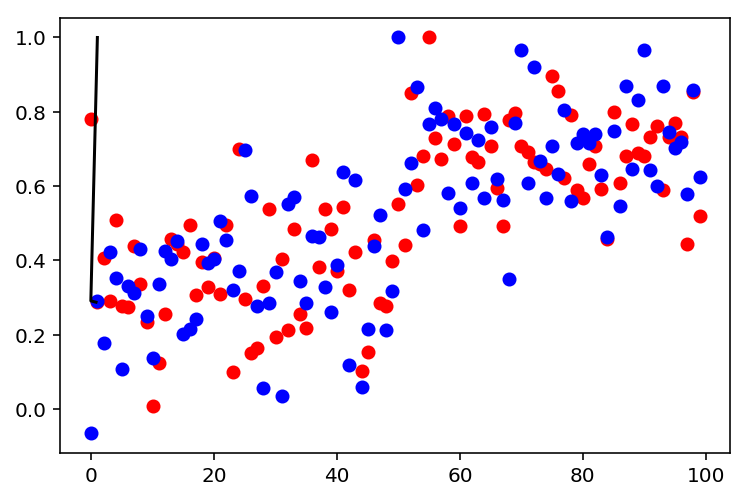

In [101]:
plt.plot(x, 'ro', y, 'bo')
plt.plot(data.T[0], data.T[1], color='black')
plt.plot()

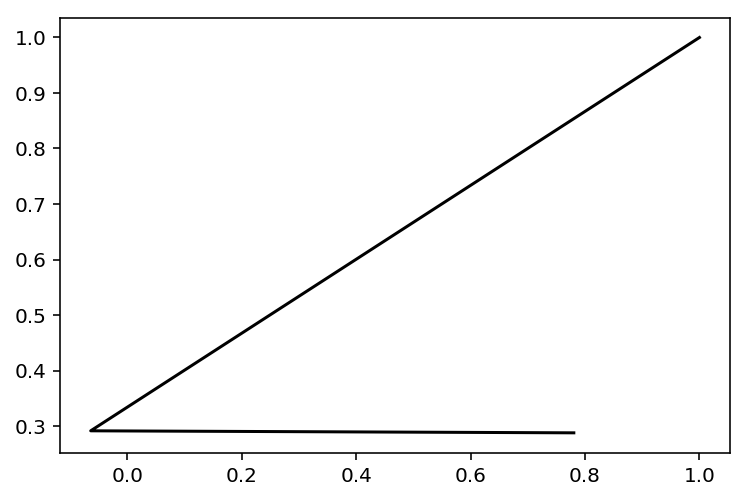